In [72]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from sklearn.metrics import confusion_matrix
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.python.keras.preprocessing import image
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns
from keras import backend as K
import cv2

In [73]:
def Sensitivity(tn, fp, fn, tp) :
    return tp / (tp + fn)

def Specificity(tn, fp, fn, tp) :
    return tn / (fp + tn)

def Precision(tn, fp, fn, tp) :
    return tp / (tp + fp)

def Precision2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33) :
    p0 = m00 / (m00+m10+m20+m30)
    p1 = m11 / (m10+m11+m21+m31)
    p2 = m22 / (m20+m12+m22+m32)
    p3 = m33 / (m30+m13+m23+m33)
    return (p0+p1+p2+p3) / 4

def Recall(tn, fp, fn, tp) :
    return tp / (tp + fn)

def Recall2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33) :
    r0 = m00 / (m00+m01+m02+m03)
    r1 = m11 / (m10+m11+m12+m13)
    r2 = m22 / (m20+m21+m22+m23)
    r3 = m33 / (m30+m31+m32+m33)
    return (r0+r1+r2+r3) / 4

def accuracy(tn, fp, fn, tp) :
    return (tp + tn) / (tp + fn + fp + tn)

def accuracy2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33) :
    return (m00+m11+m22+m33) / test_images.shape[0]

def f1(tn, fp, fn, tp):
    return (2 * Precision(tn, fp, fn, tp) * Recall(tn, fp, fn, tp))/(Precision(tn, fp, fn, tp)+Recall(tn, fp, fn, tp))

def f12(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33) :
    precision = Precision2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)
    recall = Recall2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)
    return 2 * (precision*recall) / (precision+recall)


In [133]:
def load_testing():
    images = np.load(os.path.join('../Data_final_fullver', 'images.npy'))
    labels1 = np.load(os.path.join('../Data_final_fullver', 'labels1.npy'))
    labels2 = np.load(os.path.join('../Data_final_fullver', 'labels2.npy'))
    labels3 = np.load(os.path.join('../Data_final_fullver', 'labels3.npy'))
    return images, labels1, labels2, labels3

In [134]:
filename = np.load(os.path.join('../Data_final_fullver', 'filename.npy'))
test_images, test_labels1, test_labels2, test_labels3 = load_testing()
n_test_img = test_images.shape[0]

test_labels1_raw = test_labels1.copy()
test_labels2_raw = test_labels2.copy()
test_labels3_raw = test_labels3.copy()
test_labels1 = to_categorical(test_labels1)
test_labels2 = to_categorical(test_labels2)
test_labels3 = to_categorical(test_labels3)

test_images = test_images.reshape((n_test_img, 256, 256, 1))

test_images = test_images.astype('uint16')/256
test_images = np.repeat(test_images, 3, axis=3)

preprocess_input(test_images);

In [135]:
test_images.shape

(10, 256, 256, 3)

In [136]:
test_labels1_raw

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [137]:
test_labels2_raw

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [138]:
test_labels3_raw

array([1, 0, 1, 3, 1, 2, 3, 2, 2, 1], dtype=int64)

In [139]:
calc_or_mass = models.load_model('E:/model/model/vgg16_calc_or_mass_fine_RMSprop_best.h5')

In [140]:
calc = models.load_model('E:/model/model/vgg19_calc_benign_or_malignant_fine_RMSprop_best.h5')

In [141]:
mass = models.load_model('E:/model/model/vgg19_mass_benign_or_malignant_fine_RMSprop_best.h5')

In [142]:
vgg16_4_classes = models.load_model('E:/model/model/vgg19_4_classes_RMSprop.h5')

In [143]:
y_pred1 = calc_or_mass.predict(test_images)
predict1=np.argmax(y_pred1,axis=1)
#predict1

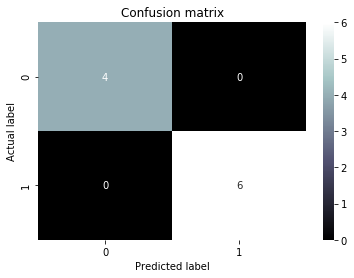

In [144]:
tn, fp, fn, tp = confusion_matrix(test_labels1_raw, predict1).ravel()
matrix = confusion_matrix(test_labels1_raw, predict1)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [145]:
print('Sensitivity : '+ str(Sensitivity(tn, fp, fn, tp)))
print('Specificity : '+ str(Specificity(tn, fp, fn, tp)))
print('Precision : '+ str(Precision(tn, fp, fn, tp)))
print('Recall : '+ str(Recall(tn, fp, fn, tp)))
print('accuracy : '+ str(accuracy(tn, fp, fn, tp)))
print('f1 : ' + str(f1(tn, fp, fn, tp)))

Sensitivity : 1.0
Specificity : 1.0
Precision : 1.0
Recall : 1.0
accuracy : 1.0
f1 : 1.0


In [146]:
y_pred4 = vgg16_4_classes.predict(test_images)
predict4=np.argmax(y_pred4,axis=1)
predict4

array([3, 1, 1, 1, 1, 2, 1, 0, 0, 0], dtype=int64)

In [147]:
test_labels3_raw

array([1, 0, 1, 3, 1, 2, 3, 2, 2, 1], dtype=int64)

['BENIGN_calcification',
 'BENIGN_mass',
 'MALIGNANT_calcification',
 'MALIGNANT_mass']

In [148]:
y_pred2 = calc.predict(test_images)
predict2=np.argmax(y_pred2,axis=1)
predict2

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [149]:
y_pred3 = mass.predict(test_images)
predict3=np.argmax(y_pred3,axis=1)
predict3

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [150]:
predict5 = []
for i in range(test_images.shape[0]):
    if(predict1[i] == 0):
        if(predict2[i] == 0): #benign_calcification
            predict5.append(0)
        elif (predict2[i] == 1):#malignant_calcification
            predict5.append(2)
    elif (predict1[i] == 1):
        if(predict3[i] == 0): #benign_mass
            predict5.append(1)
        elif (predict3[i] == 1): #malignant_mass
            predict5.append(3)

In [151]:
label2_index = []
label3_index = []
label2_only = []
label3_only = []
for i in range(test_images.shape[0]):
    if(test_labels1_raw[i] == 0):
        if(test_labels2_raw[i] == 0): #benign_calcification
            label2_only.append(test_labels2_raw[i])
            label2_index.append(i)
        elif (test_labels2_raw[i] == 1):#malignant_calcification
            label2_only.append(test_labels2_raw[i])
            label2_index.append(i)
    elif (test_labels1_raw[i] == 1):
        if(test_labels2_raw[i] == 0): #benign_mass
            label3_only.append(test_labels2_raw[i])
            label3_index.append(i)
        elif (test_labels2_raw[i] == 1): #malignant_mass
            label3_only.append(test_labels2_raw[i])
            label3_index.append(i)

In [152]:
len(label3_only)

6

In [153]:
label2_images = test_images[label2_index,:]
label3_images = test_images[label3_index,:]

In [154]:
y_pred3 = mass.predict(label3_images)
predict3=np.argmax(y_pred3,axis=1)
#predict3

In [155]:
y_pred2 = calc.predict(label2_images)
predict2=np.argmax(y_pred2,axis=1)

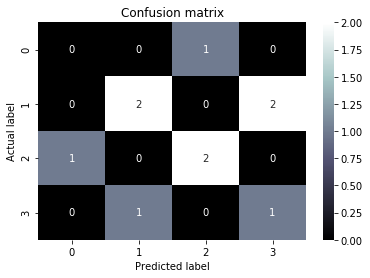

In [156]:
matrix = confusion_matrix(test_labels3_raw, predict5)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

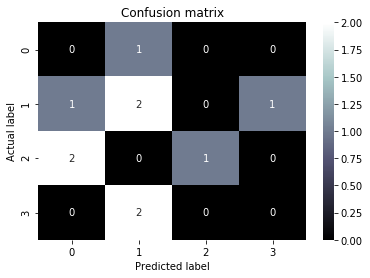

In [157]:
matrix = confusion_matrix(test_labels3_raw, predict4)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [158]:
m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33 = confusion_matrix(test_labels3_raw, predict4).ravel()

print('Precision : '+ str(Precision2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))
print('Recall : '+ str(Recall2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))
print('accuracy : '+ str(accuracy2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))
print('f1 : ' + str(f12(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))


Precision : 0.18333333333333335
Recall : 0.20833333333333331
accuracy : 0.3
f1 : 0.1950354609929078


In [100]:
m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33 = confusion_matrix(test_labels3_raw, predict5).ravel()

print('Precision : '+ str(Precision2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))
print('Recall : '+ str(Recall2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))
print('accuracy : '+ str(accuracy2(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))
print('f1 : ' + str(f12(m00, m01, m02, m03, m10, m11, m12, m13, m20, m21, m22, m23, m30, m31, m32, m33)))


Precision : 0.5818471898510678
Recall : 0.6253317720530835
accuracy : 0.6349480968858131
f1 : 0.6028062876771112


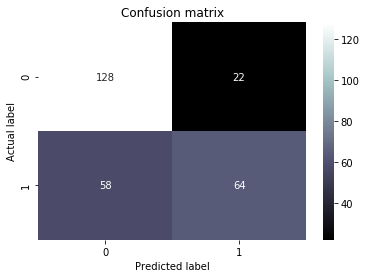

In [101]:
matrix = confusion_matrix(label2_only, predict2)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="bone" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [102]:
tn, fp, fn, tp = confusion_matrix(label2_only, predict2).ravel()
tn, fp, fn, tp

(128, 22, 58, 64)

In [103]:
print('Sensitivity : '+ str(Sensitivity(tn, fp, fn, tp)))
print('Specificity : '+ str(Specificity(tn, fp, fn, tp)))
print('Precision : '+ str(Precision(tn, fp, fn, tp)))
print('Recall : '+ str(Recall(tn, fp, fn, tp)))
print('accuracy : '+ str(accuracy(tn, fp, fn, tp)))
print('f1 : ' + str(f1(tn, fp, fn, tp)))

Sensitivity : 0.5245901639344263
Specificity : 0.8533333333333334
Precision : 0.7441860465116279
Recall : 0.5245901639344263
accuracy : 0.7058823529411765
f1 : 0.6153846153846153


In [104]:
y_pred_prob=calc.predict(label2_images)
fpr, tpr, thresholds = roc_curve(label2_only, y_pred_prob[:,1])

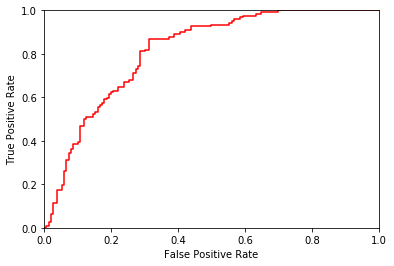

In [105]:
def plot_roc_curve(fpr,tpr):
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.plot(fpr,tpr,color='red')
    plt.show()
plot_roc_curve(fpr,tpr)

In [106]:
auc_score=roc_auc_score(label2_only, y_pred_prob[:,1])
auc_score

0.8126775956284154

Calc-Training_P_00658_LEFT_MLO.png


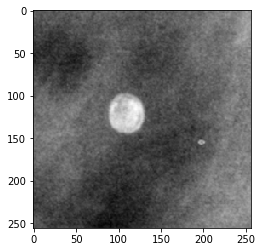

In [126]:
idx = 422
print(filename[idx])

plt.imshow(test_images[idx][:,:,0], cmap='gray')
plt.show()
plt.imsave("img.png", test_images[idx][:,:,0], cmap='gray')

x = test_images[idx]
x = np.expand_dims(x, axis= 0)

In [127]:
model = mass
preds = model.predict(x)
print(preds)

[[0.02558674 0.9744133 ]]


In [128]:
np.argmax(preds[0])

1

In [129]:
conv_layer_output_value = []
axis = 0

mymodel_output = model.output[:, np.argmax(preds[0])]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(mymodel_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
    
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

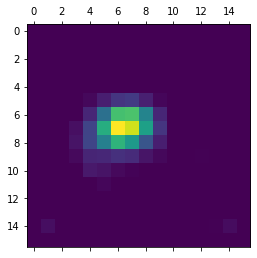

In [130]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

plt.matshow(heatmap)

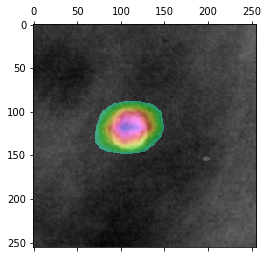

In [131]:
img_path = 'img.png'
img = image.load_img(img_path, target_size = (256, 256))

background=image.img_to_array(img)
heatmap1 = cv2.resize(heatmap, (background.shape[1], background.shape[0]))
heatmap2 = np.uint8(255 * heatmap1)                     
heatmap3 = cv2.applyColorMap(heatmap2, cv2.COLORMAP_HSV)
heatmap3[np.where(heatmap1 < 0.2)] = 0

superimposed_img =  np.uint8(heatmap3 * 0.4+ background*0.6)
plt.matshow(superimposed_img)
plt.show()

In [132]:
plt.imsave("img2.png", heatmap)
plt.imsave("img3.png", superimposed_img)